In [45]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the downloaded dataset into a pandas DataFrame
# Update the file path to the correct location of the dataset
import os

path = "../stephanie/acaht_prod_fourn_stock.csv"  # Assign the path to the variable 'path'
if os.path.exists(path):
	data = pd.read_csv(path)   # Load the dataset if the file exists
	print("Dataset loaded successfully.")
else:
	print(f"File not found at path: {path}")

Dataset loaded successfully.


In [9]:
data.head()

id_achat   date_achat id_produit  quantit√© id_fournisseur  prix_unitaire  \
0  PO000001   2024-03-22     P00627       150           S029         129.62   
1  PO000002   2024-06-12     P00469        50           S028         110.81   
2  PO000003   2024-01-19     P00849        75           S001         140.58   
3  PO000004   2024-11-20     P00484       500           S028         120.77   
4  PO000005  2a024-06-07     P00196        50           S025         256.05   

   d√©lai_livraison_jours  montant_total  mois  ann√©e  ...           marque  \
0                     14        19443.0     3   2024  ...  Atelier Min√©ral   
1                      8         5540.5     6   2024  ...      Reflet d'or   
2                      8        10543.5     1   2024  ...  √É¬âveil √É¬âl√©gant   
3                      9        60385.0    11   2024  ...      Reflet d'or   
4                     13        12802.5     6   2024  ...       Luxe eclat   

     prix stock_minimum      nom_fournisseur     ville       pays fiabilit√©  \
0   39.95            18  Fontaine Lopes S.A.  Helsinki   Finlande      0.54   
1   25.58            18   Delattre Blot S.A.    Berlin  Allemagne      0.74   
2   62.78            83      Lecomte et Fils    Zurich     Suisse      0.84   
3  259.47            39   Delattre Blot S.A.    Berlin  Allemagne      0.74   
4  353.45            33            Techer SA  Varsovie    Pologne      0.92   

  d√©lai_moyen_jours  niveau_stock   entrepot  
0                 6           289      Paris  
1                 8            80      Paris  
2                10            54  Marseille  
3                 8           249  Marseille  
4                12           119      Paris  

[5 rows x 22 columns]

In [10]:
data.describe()

quantit√©  prix_unitaire  d√©lai_livraison_jours  montant_total  \
count  10000.000000   10000.000000           10000.000000   10000.000000   
mean      99.512500     155.187121               7.955900   15530.706135   
std       98.580534      83.661601               3.754273   19313.230160   
min       10.000000      10.030000               2.000000     100.300000   
25%       25.000000      83.087500               5.000000    3508.937500   
50%       75.000000     155.365000               8.000000    9099.500000   
75%      100.000000     227.740000              11.000000   19748.062500   
max      500.000000     299.980000              14.000000  148310.000000   

               mois    ann√©e  jour_semaine          prix  stock_minimum  \
count  10000.000000  10000.0  10000.000000  10000.000000   10000.000000   
mean       6.537200   2024.0      2.978200    258.293713      53.283000   
std        3.455316      0.0      2.011549    141.211258      25.376137   
min        1.000000   2024.0      0.000000     22.220000      10.000000   
25%        4.000000   2024.0      1.000000    130.720000      31.000000   
50%        7.000000   2024.0      3.000000    258.450000      54.000000   
75%       10.000000   2024.0      5.000000    376.880000      74.000000   
max       12.000000   2024.0      6.000000    499.720000      99.000000   

          fiabilit√©  d√©lai_moyen_jours  niveau_stock  
count  10000.000000        10000.00000  10000.000000  
mean       0.697760            7.05340    147.771300  
std        0.143535            2.19076     88.354962  
min        0.500000            3.00000      0.000000  
25%        0.540000            6.00000     72.000000  
50%        0.650000            7.00000    145.000000  
75%        0.740000            8.00000    226.000000  
max        1.000000           14.00000    299.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_achat               10000 non-null  object 
 1   date_achat             10000 non-null  object 
 2   id_produit             10000 non-null  object 
 3   quantit√©               10000 non-null  int64  
 4   id_fournisseur         10000 non-null  object 
 5   prix_unitaire          10000 non-null  float64
 6   d√©lai_livraison_jours  10000 non-null  int64  
 7   montant_total          10000 non-null  float64
 8   mois                   10000 non-null  int64  
 9   ann√©e                  10000 non-null  int64  
 10  jour_semaine           10000 non-null  int64  
 11  cat√©gorie              10000 non-null  object 
 12  marque                 10000 non-null  object 
 13  prix                   10000 non-null  float64
 14  stock_minimum          10000 non-null  int64  
 15 

In [12]:
data.isnull().sum()

id_achat                 0
date_achat               0
id_produit               0
quantit√©                 0
id_fournisseur           0
prix_unitaire            0
d√©lai_livraison_jours    0
montant_total            0
mois                     0
ann√©e                    0
jour_semaine             0
cat√©gorie                0
marque                   0
prix                     0
stock_minimum            0
nom_fournisseur          0
ville                    0
pays                     0
fiabilit√©                0
d√©lai_moyen_jours        0
niveau_stock             0
entrepot                 0
dtype: int64

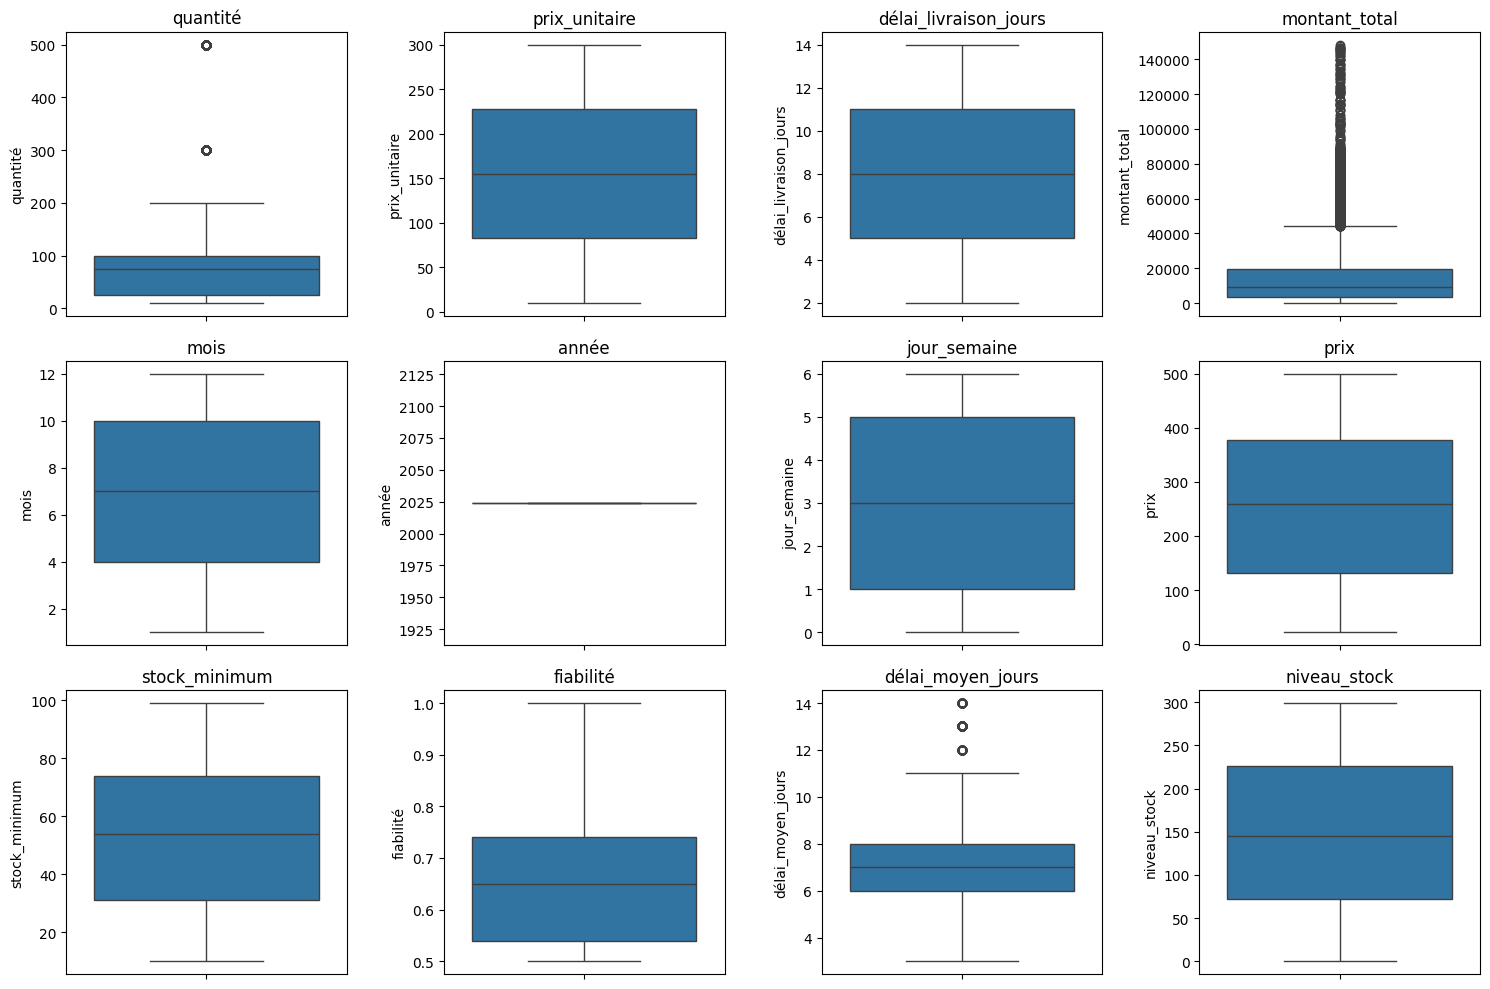

In [13]:
# Cr√©er des box plots pour chaque variable num√©rique
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Ajustez les dimensions du subplot en fonction du nombre de colonnes
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

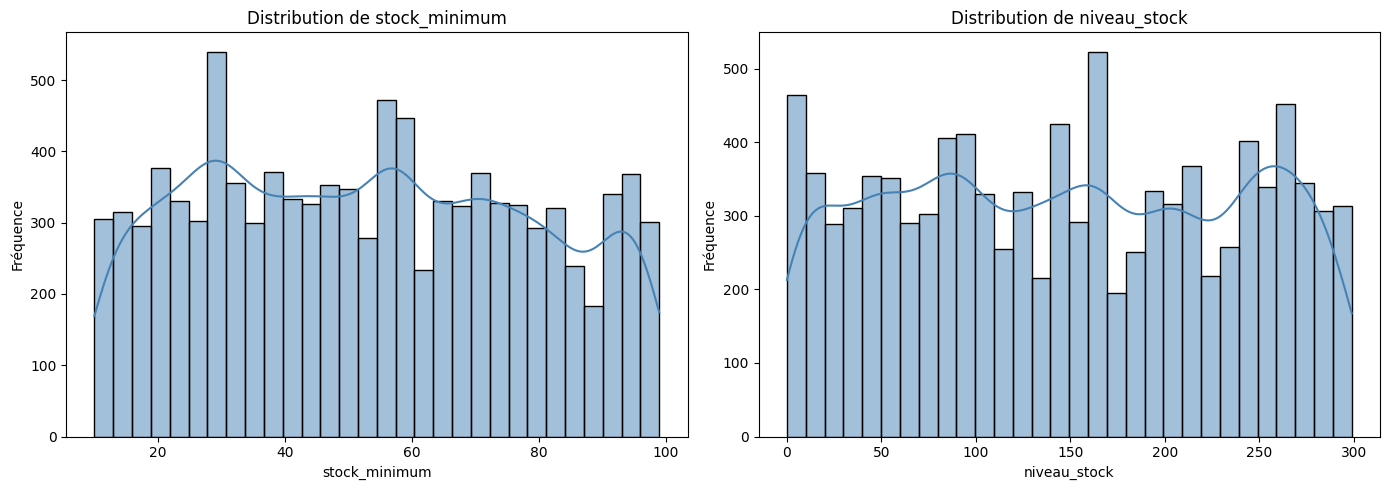

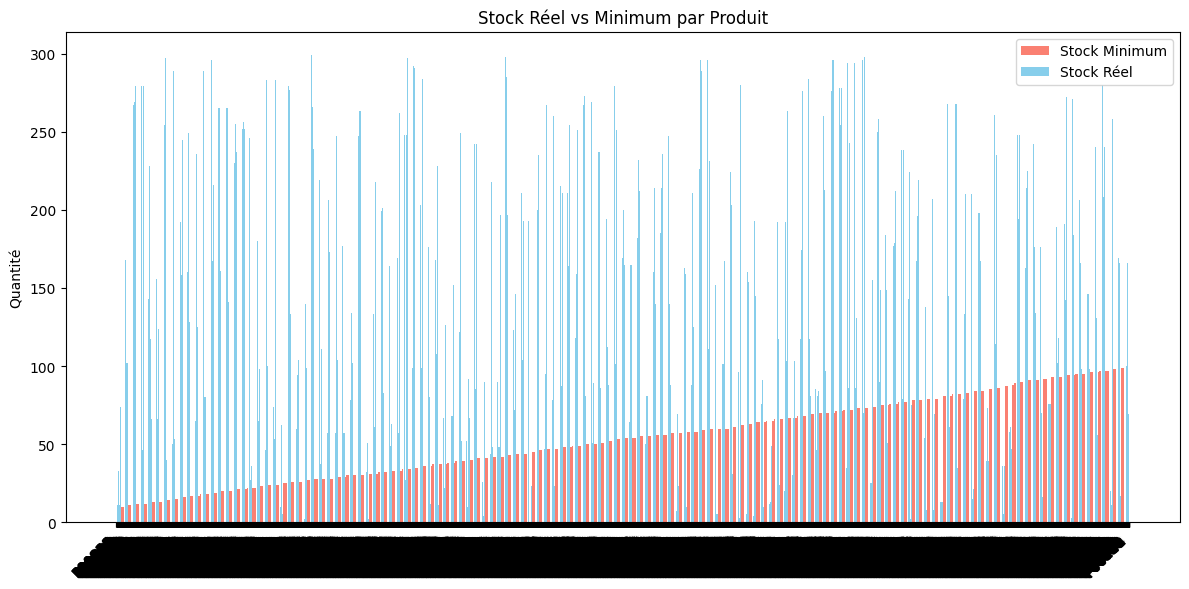

In [14]:
# üéØ 1. Distribution des stocks (minimum & r√©el)
plt.figure(figsize=(14, 5))

for i, column in enumerate(['stock_minimum', 'niveau_stock'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel("Fr√©quence")

plt.tight_layout()
plt.show()

# üìä 2. Bar Chart : Stock r√©el vs Stock minimum par produit
plt.figure(figsize=(12, 6))
data_sorted = data.sort_values('stock_minimum')
bar_width = 0.4
x = range(len(data_sorted))

plt.bar(x, data_sorted['stock_minimum'], width=bar_width, label='Stock Minimum', color='salmon')
plt.bar([p + bar_width for p in x], data_sorted['niveau_stock'], width=bar_width, label='Stock R√©el', color='skyblue')

plt.xticks([p + bar_width / 2 for p in x], data_sorted['id_produit'], rotation=45, ha='right')
plt.title('Stock R√©el vs Minimum par Produit')
plt.ylabel('Quantit√©')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/501415501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')


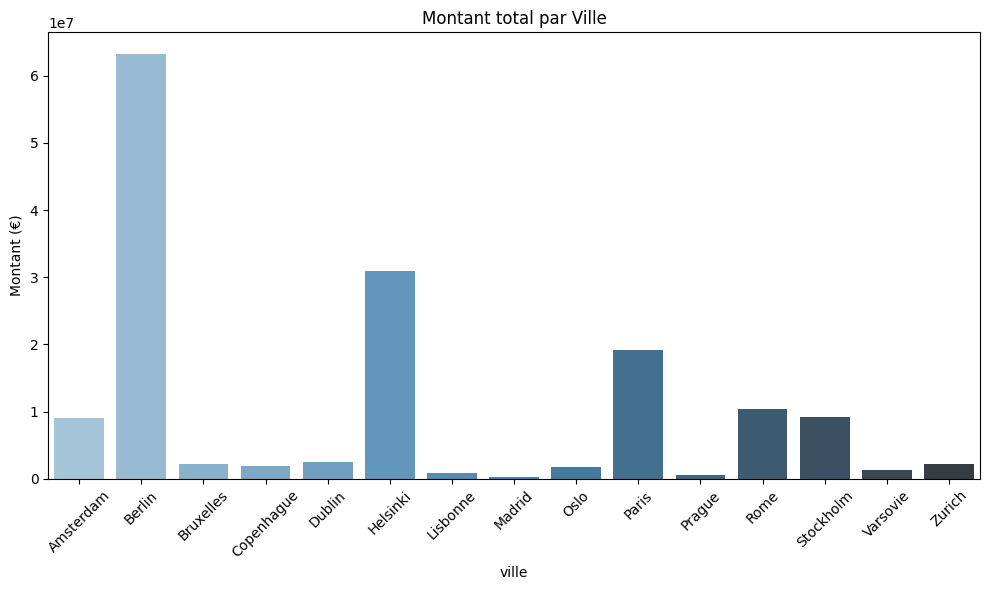

In [15]:
# üèôÔ∏è 4. Bar Chart : Ville vs Montant total
plt.figure(figsize=(10, 6))
ville_montant = data.groupby('ville')['montant_total'].sum().reset_index()
sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')
plt.title('Montant total par Ville')
plt.xticks(rotation=45)
plt.ylabel('Montant (‚Ç¨)')
plt.tight_layout()
plt.show()


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/4150229535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='nom_fournisseur', y='fiabilit√©', palette='coolwarm')


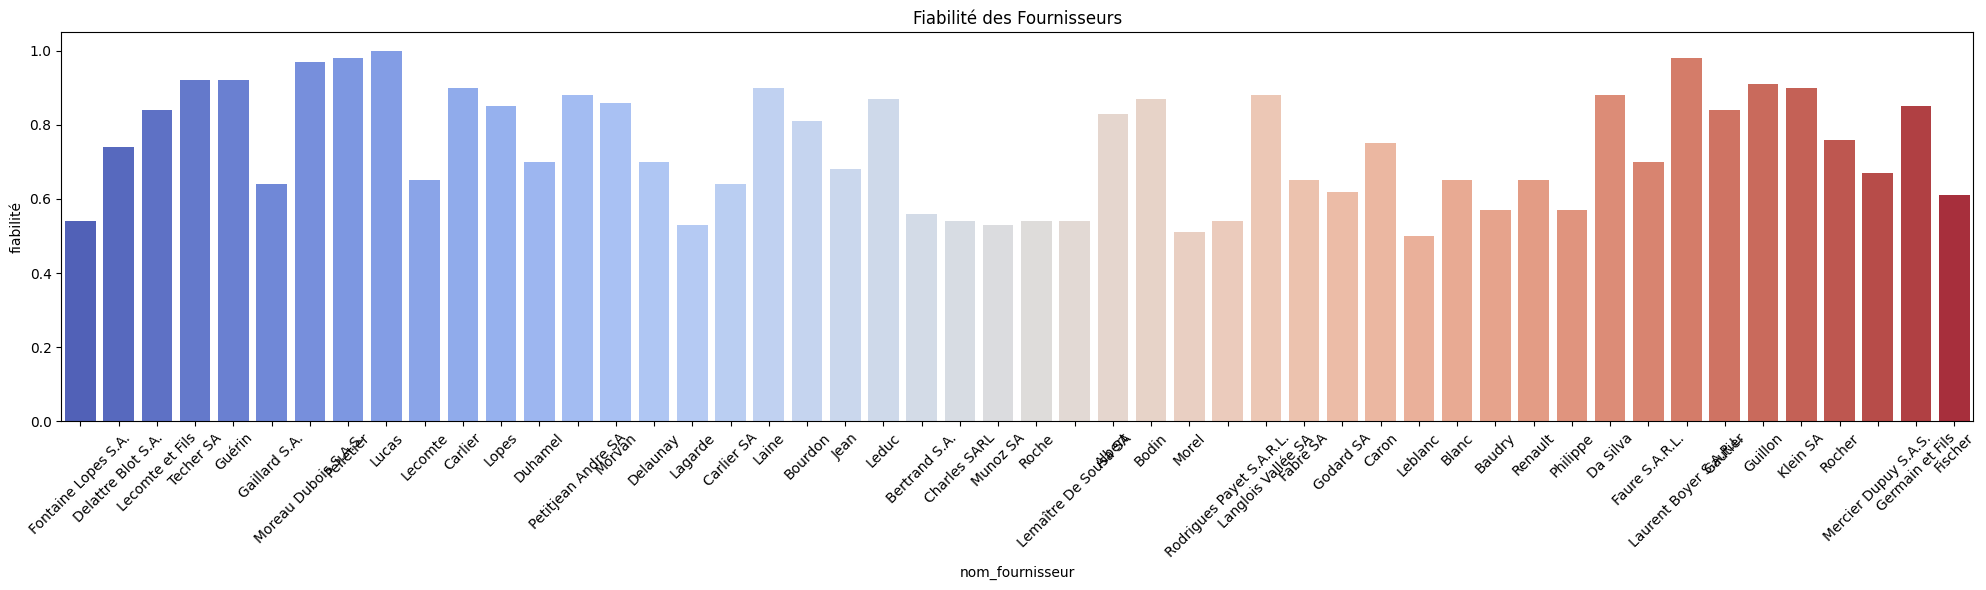

In [16]:
# üß© 6. Fiabilit√© vs Fournisseur (Scatter ou Barplot selon type de variable)
plt.figure(figsize=(20, 6))
# Si 'fiabilit√©' est num√©rique :
sns.barplot(data=data, x='nom_fournisseur', y='fiabilit√©', palette='coolwarm')
# Sinon si c‚Äôest une cat√©gorie : utiliser `countplot` ou mapper en valeur num√©rique
plt.title('Fiabilit√© des Fournisseurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/620272134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantit√©', palette='Blues_d')


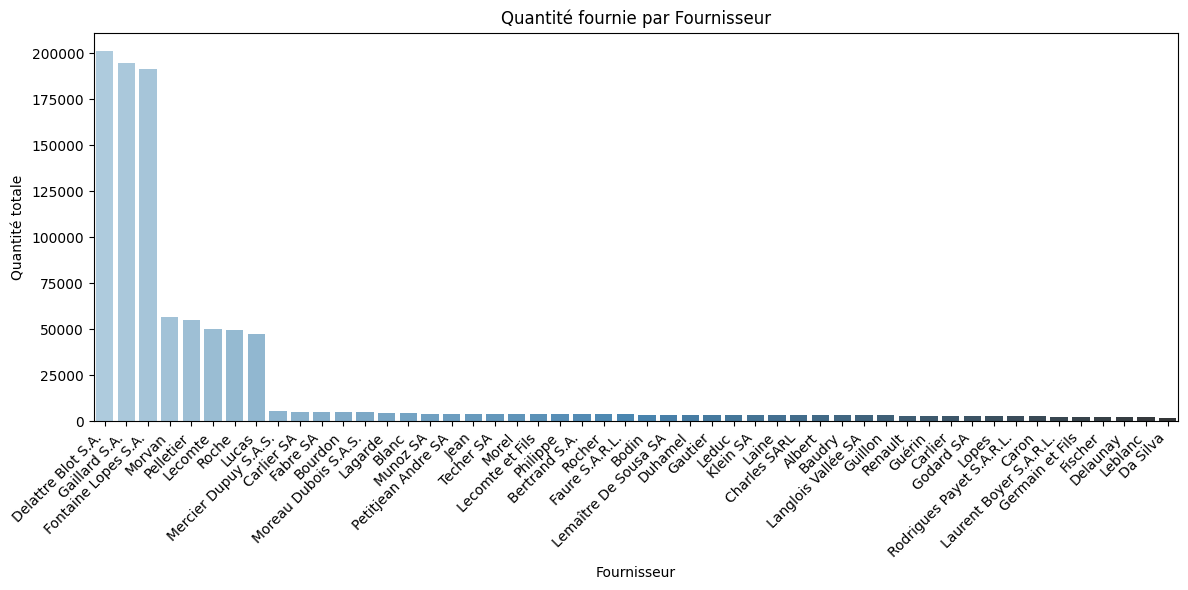

In [17]:
# Regrouper les quantit√©s par fournisseur
quantite_par_fournisseur = data.groupby('nom_fournisseur')['quantit√©'].sum().reset_index()

# Trier du plus grand au plus petit
quantite_par_fournisseur = quantite_par_fournisseur.sort_values(by='quantit√©', ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantit√©', palette='Blues_d')
plt.title('Quantit√© fournie par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Quantit√© totale')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

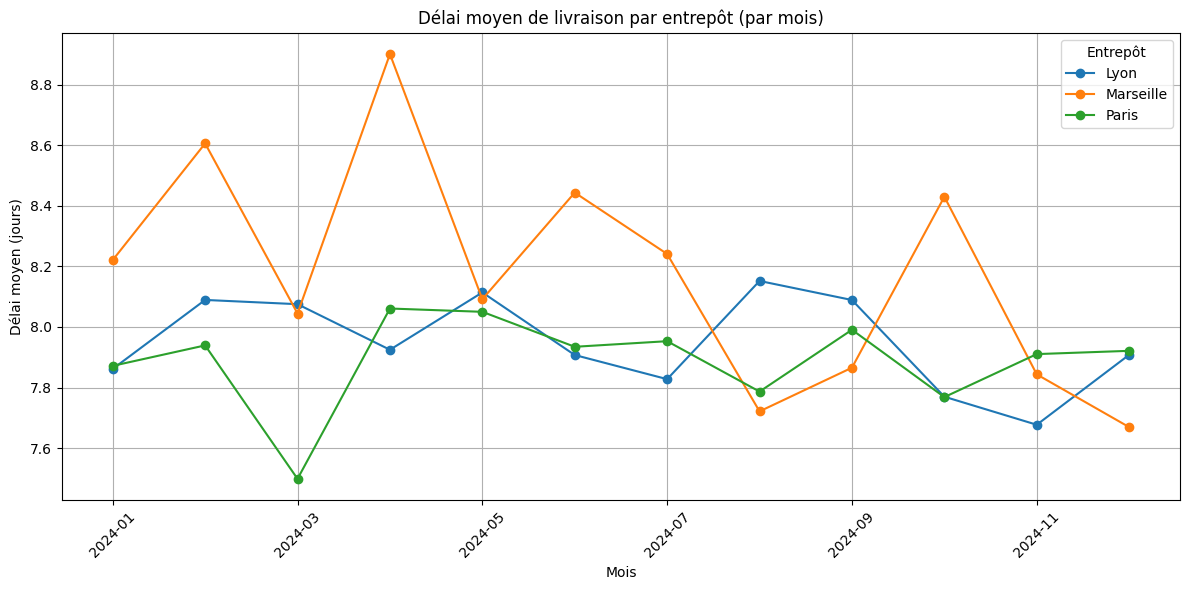

In [18]:
# Cr√©er une colonne 'date' au format AAAA-MM pour grouper par mois
# Clean the 'date_achat' column by replacing invalid dates with NaT
data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce', format='%Y-%m-%d')

# Drop rows with invalid dates
data = data.dropna(subset=['date_achat'])

# Create a 'mois_complet' column in the format YYYY-MM for grouping by month
data['mois_complet'] = data['date_achat'].dt.to_period('M').astype(str)

# Grouper par mois + entrep√¥t et calculer la moyenne du d√©lai de livraison
delai_mensuel = data.groupby(['mois_complet', 'entrepot'])['d√©lai_livraison_jours'].mean().reset_index()

# Pivot pour cr√©er une colonne par entrep√¥t (utile pour matplotlib)
pivot = delai_mensuel.pivot(index='mois_complet', columns='entrepot', values='d√©lai_livraison_jours')

# Tracer
pivot.plot(marker='o', figsize=(12, 6))
plt.title("D√©lai moyen de livraison par entrep√¥t (par mois)")
plt.xlabel("Mois")
plt.ylabel("D√©lai moyen (jours)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Entrep√¥t")
plt.show()


In [19]:
print(data.columns)


Index(['id_achat', 'date_achat', 'id_produit', 'quantit√©', 'id_fournisseur',
       'prix_unitaire', 'd√©lai_livraison_jours', 'montant_total', 'mois',
       'ann√©e', 'jour_semaine', 'cat√©gorie', 'marque', 'prix', 'stock_minimum',
       'nom_fournisseur', 'ville', 'pays', 'fiabilit√©', 'd√©lai_moyen_jours',
       'niveau_stock', 'entrepot', 'mois_complet'],
      dtype='object')


In [20]:
# Fonction pour calculer le HHI
def calculate_hhi(series):
    shares = series / series.sum()
    hhi = (shares ** 2).sum() * 10000  # HHI est souvent multipli√© par 10,000 pour lisibilit√©
    return hhi

# HHI par produit
quantities_by_product = data.groupby('id_produit')['quantit√©'].sum()
hhi_product = calculate_hhi(quantities_by_product)

# HHI par fournisseur
quantities_by_supplier = data.groupby('id_fournisseur')['quantit√©'].sum()
hhi_supplier = calculate_hhi(quantities_by_supplier)

hhi_product, hhi_supplier

(np.float64(11.996626030740527), np.float64(1301.638054542709))



HHI par produit : 12.0 ‚Üí tr√®s faible concentration ‚Üí les achats sont tr√®s bien r√©partis entre les produits.
HHI par fournisseur : 1301.5 ‚Üí concentration mod√©r√©e ‚Üí certains fournisseurs livrent davantage que d'autres, mais aucun ne domine totalement.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/1811700647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hhi_data, x='Cat√©gorie', y='HHI', palette='viridis')


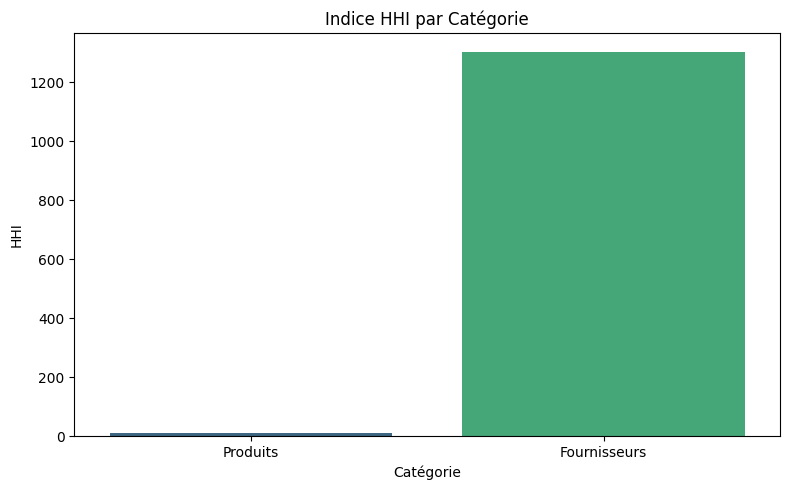

In [21]:
# Visualisation des indices HHI

# Cr√©er un DataFrame pour les HHI
hhi_data = pd.DataFrame({
    'Cat√©gorie': ['Produits', 'Fournisseurs'],
    'HHI': [hhi_product, hhi_supplier]
})

# Tracer un graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(data=hhi_data, x='Cat√©gorie', y='HHI', palette='viridis')
plt.title('Indice HHI par Cat√©gorie')
plt.ylabel('HHI')
plt.xlabel('Cat√©gorie')
plt.tight_layout()
plt.show()

In [23]:
# Calculer la rotation moyenne des stocks par cat√©gorie
rotation_par_categorie = data.groupby('cat√©gorie')['rotation_stock'].mean().reset_index()

# Trier les cat√©gories par rotation moyenne d√©croissante
rotation_par_categorie = rotation_par_categorie.sort_values(by='rotation_stock', ascending=False)

# Visualiser la rotation des stocks par cat√©gorie
plt.figure(figsize=(12, 6))
sns.barplot(data=rotation_par_categorie, x='cat√©gorie', y='rotation_stock', palette='viridis')
plt.title('Rotation des stocks par cat√©gorie')
plt.xlabel('Cat√©gorie')
plt.ylabel('Rotation des stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Column not found: rotation_stock'

Le dernier visuel montre la rotation des stocks par cat√©gorie sous forme de graphique en barres. Il met en √©vidence les cat√©gories ayant les rotations les plus √©lev√©es, ce qui indique une fr√©quence de renouvellement rapide des stocks pour ces cat√©gories. Par exemple, les "Soins capillaires" et le "Maquillage" ont les rotations les plus √©lev√©es, ce qui peut refl√©ter une forte demande ou une gestion efficace des stocks. √Ä l'inverse, les cat√©gories avec une rotation plus faible, comme les "Soins de la peau", pourraient n√©cessiter une analyse pour optimiser leur gestion ou mieux comprendre leur demande.

Taux de satisfaction global : 20.22%


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_2127/2970179939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')


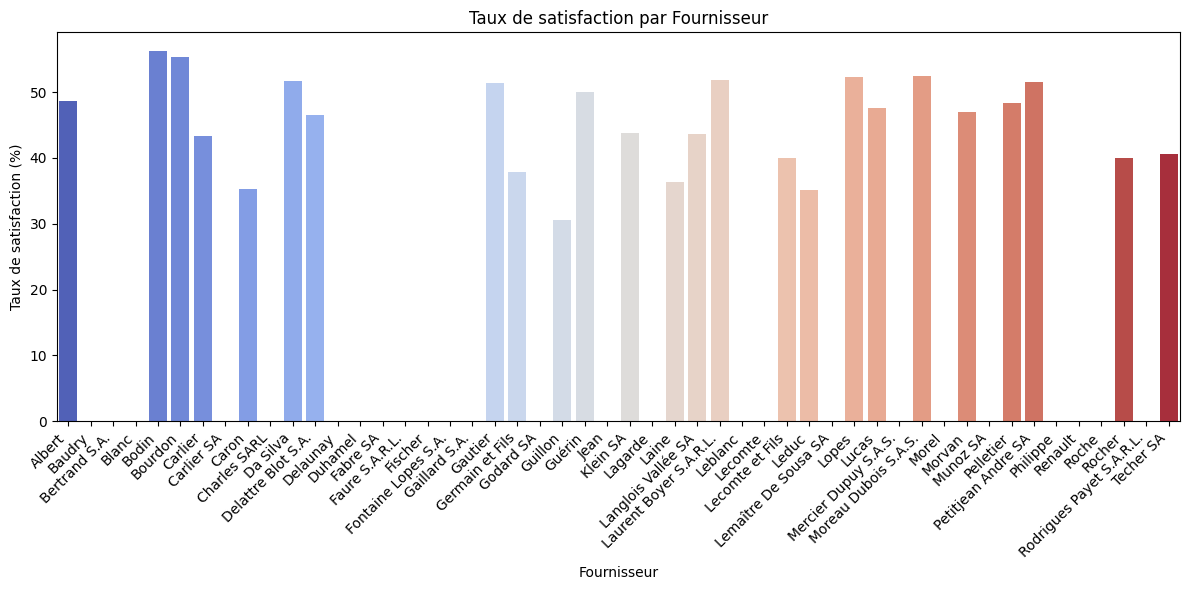

In [ ]:
# Calculer le taux de satisfaction des commandes
# Une commande est consid√©r√©e comme satisfaisante si le d√©lai de livraison est inf√©rieur ou √©gal √† la moyenne et si la fiabilit√© est sup√©rieure √† un seuil (par exemple, 0.7)
seuil_fiabilite = 0.7
delai_moyen = data['d√©lai_livraison_jours'].mean()

data['satisfaction'] = ((data['d√©lai_livraison_jours'] <= delai_moyen) & (data['fiabilit√©'] > seuil_fiabilite)).astype(int)

# Calculer le taux de satisfaction global
taux_satisfaction = data['satisfaction'].mean() * 100
print(f"Taux de satisfaction global : {taux_satisfaction:.2f}%")

# Visualiser le taux de satisfaction par fournisseur
satisfaction_par_fournisseur = data.groupby('nom_fournisseur')['satisfaction'].mean().reset_index()
satisfaction_par_fournisseur['satisfaction'] *= 100

plt.figure(figsize=(12, 6))
sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')
plt.title('Taux de satisfaction par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Taux de satisfaction (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le visuel montre le taux de satisfaction par fournisseur sous forme de graphique en barres. Il met en √©vidence les fournisseurs ayant les taux de satisfaction les plus √©lev√©s, ce qui refl√®te une meilleure performance en termes de fiabilit√© et de respect des d√©lais de livraison. Par exemple, certains fournisseurs comme "Bodin" et "Bourdon" affichent des taux de satisfaction sup√©rieurs √† 50 %, ce qui indique une bonne gestion de leurs commandes. En revanche, plusieurs fournisseurs ont un taux de satisfaction nul, ce qui peut signaler des probl√®mes r√©currents dans leurs performances. Ce graphique permet d'identifier les partenaires fiables et ceux n√©cessitant une am√©lioration.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_2127/64781939.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')


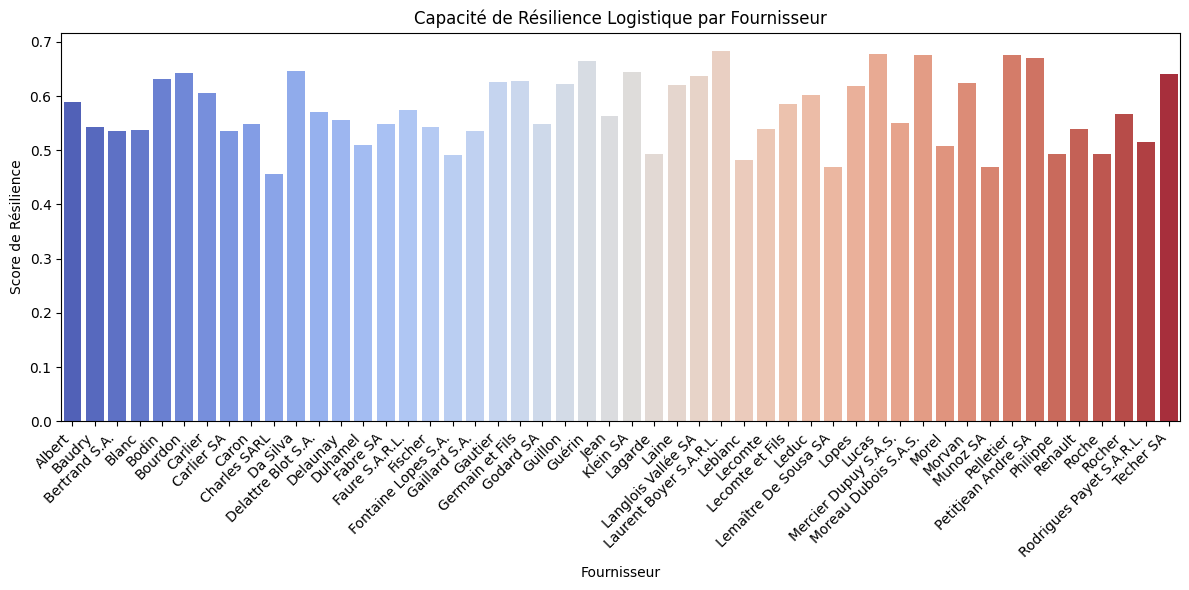

In [ ]:
# D√©finir les pond√©rations pour chaque indicateur
poids_fiabilite = 0.4
poids_delai = 0.3
poids_stock = 0.3

# Normaliser les indicateurs entre 0 et 1
data['fiabilite_norm'] = data['fiabilit√©'] / data['fiabilit√©'].max()
data['delai_norm'] = 1 - (data['d√©lai_livraison_jours'] / data['d√©lai_livraison_jours'].max())
data['stock_norm'] = data['niveau_stock'] / data['niveau_stock'].max()

# Calculer le score de r√©silience pour chaque ligne
data['score_resilience'] = (
    poids_fiabilite * data['fiabilite_norm'] +
    poids_delai * data['delai_norm'] +
    poids_stock * data['stock_norm']
)

# Calculer la r√©silience moyenne par fournisseur
resilience_par_fournisseur = data.groupby('nom_fournisseur')['score_resilience'].mean().reset_index()

# Visualiser la r√©silience par fournisseur
plt.figure(figsize=(12, 6))
sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')
plt.title('Capacit√© de R√©silience Logistique par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Score de R√©silience')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le dernier visuel illustre la capacit√© de r√©silience logistique par fournisseur sous forme de graphique en barres. Il met en √©vidence les fournisseurs ayant les scores de r√©silience les plus √©lev√©s, refl√©tant une meilleure performance globale en termes de fiabilit√©, d√©lais de livraison et gestion des stocks. Par exemple, des fournisseurs comme "Laurent Boyer S.A.R.L." et "Lucas" affichent des scores de r√©silience sup√©rieurs √† 0.67, ce qui indique une gestion logistique efficace. En revanche, certains fournisseurs comme "Leblanc" et "Lagarde" ont des scores plus faibles, sugg√©rant des opportunit√©s d'am√©lioration dans leur cha√Æne logistique. Ce graphique permet d'identifier les partenaires les plus performants et ceux n√©cessitant une attention particuli√®re pour optimiser la r√©silience globale.

Les Insectes sontarriv√©es 

# COde qui ne fonctionne pas 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantit√©               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   d√©lai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   ann√©e                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  cat√©gorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix

In [25]:
# Encodage one-hot des variables cat√©gorielles principales
colonnes_categorique = ['cat√©gorie', 'marque', 'nom_fournisseur', 'ville', 'pays', 'entrepot']

data_encoded = pd.get_dummies(data, columns=colonnes_categorique, drop_first=True)
data_encoded.head()

id_achat date_achat id_produit  quantit√© id_fournisseur  prix_unitaire  \
0  PO000001 2024-03-22     P00627       150           S029         129.62   
1  PO000002 2024-06-12     P00469        50           S028         110.81   
2  PO000003 2024-01-19     P00849        75           S001         140.58   
3  PO000004 2024-11-20     P00484       500           S028         120.77   
5  PO000006 2024-03-21     P00013        50           S029          90.66   

   d√©lai_livraison_jours  montant_total  mois  ann√©e  ...  pays_Italie  \
0                     14        19443.0     3   2024  ...        False   
1                      8         5540.5     6   2024  ...        False   
2                      8        10543.5     1   2024  ...        False   
3                      9        60385.0    11   2024  ...        False   
5                     12         4533.0     3   2024  ...        False   

   pays_Norv√®ge  pays_Pays-Bas  pays_Pologne  pays_Portugal  \
0         False          False         False          False   
1         False          False         False          False   
2         False          False         False          False   
3         False          False         False          False   
5         False          False         False          False   

   pays_R√©publique tch√®que pays_Suisse  pays_Su√®de  entrepot_Marseille  \
0                    False       False       False               False   
1                    False       False       False               False   
2                    False        True       False                True   
3                    False       False       False                True   
5                    False       False       False               False   

   entrepot_Paris  
0            True  
1            True  
2           False  
3           False  
5           False  

[5 rows x 129 columns]

In [29]:
# Encodage one-hot de toutes les colonnes de type 'object' (cat√©gorielles)
colonnes_objet = data.select_dtypes(include=['object']).columns.tolist()

# On retire les colonnes d√©j√† num√©riques ou datetime si besoin
if 'date_achat' in colonnes_objet:
    colonnes_objet.remove('date_achat')

data_all_encoded = pd.get_dummies(data, columns=colonnes_objet, drop_first=True)
data_all_encoded.head()

date_achat  quantit√©  prix_unitaire  d√©lai_livraison_jours  montant_total  \
0 2024-03-22       150         129.62                     14        19443.0   
1 2024-06-12        50         110.81                      8         5540.5   
2 2024-01-19        75         140.58                      8        10543.5   
3 2024-11-20       500         120.77                      9        60385.0   
5 2024-03-21        50          90.66                     12         4533.0   

   mois  ann√©e  jour_semaine    prix  stock_minimum  ...  \
0     3   2024             4   39.95             18  ...   
1     6   2024             2   25.58             18  ...   
2     1   2024             4   62.78             83  ...   
3    11   2024             2  259.47             39  ...   
5     3   2024             3  236.40             61  ...   

   mois_complet_2024-03  mois_complet_2024-04  mois_complet_2024-05  \
0                  True                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
5                  True                 False                 False   

   mois_complet_2024-06  mois_complet_2024-07  mois_complet_2024-08  \
0                 False                 False                 False   
1                  True                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
5                 False                 False                 False   

   mois_complet_2024-09  mois_complet_2024-10  mois_complet_2024-11  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                  True   
5                 False                 False                 False   

   mois_complet_2024-12  
0                 False  
1                 False  
2                 False  
3                 False  
5                 False  

[5 rows x 11182 columns]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantit√©               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   d√©lai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   ann√©e                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  cat√©gorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix

In [ ]:
# Encodage de toutes les colonnes non num√©riques en variables num√©riques

import pandas as pd

# Si vous avez des colonnes de type date, vous pouvez les convertir en timestamp ou extraire des informations utiles
if 'date_achat' in data.columns:
    data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce')
    data['date_achat_timestamp'] = data['date_achat'].astype('int64') // 10**9  # conversion en secondes

# S√©lection des colonnes de type 'object' (cat√©gorielles)
colonnes_objet = data.select_dtypes(include=['object']).columns.tolist()

# Encodage one-hot de toutes les colonnes cat√©gorielles
data_numeric = pd.get_dummies(data, columns=colonnes_objet, drop_first=True)

# Affichage des premi√®res lignes pour v√©rification
data_numeric.head()

In [34]:
import pandas as pd

# Conversion de la colonne date si elle existe
if 'date_achat' in data.columns:
    data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce')
    data['date_achat_timestamp'] = data['date_achat'].astype('int64') // 10**9  # conversion en secondes

# Liste des colonnes object (cat√©gorielles)
colonnes_objet = data.select_dtypes(include=['object']).columns.tolist()

# Encodage one-hot de toutes les colonnes cat√©gorielles
data_numeric = pd.get_dummies(data, columns=colonnes_objet, drop_first=True)

# V√©rification du r√©sultat
print(data_numeric.select_dtypes(include=['object']).columns)  # Doit afficher Index([], dtype='object')
data_numeric.info()

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Columns: 11183 entries, date_achat to mois_complet_2024-12
dtypes: bool(11169), datetime64[ns](1), float64(4), int64(9)
memory usage: 107.6 MB


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantit√©               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   d√©lai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   ann√©e                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  cat√©gorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix

In [39]:
%pip install scikit-learn

from sklearn.preprocessing import LabelEncoder

data_le = data.copy()
colonnes_objet = data_le.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in colonnes_objet:
    data_le[col] = le.fit_transform(data_le[col].astype(str))

# V√©rification : il ne doit plus rester de colonnes object
print(data_le.select_dtypes(include=['object']).columns)  # Doit afficher Index([], dtype='object')
data_le.info()

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.2/11.2 MB 48.3 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 307.7/307.7 kB 19.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30.2/30.2 MB 26.7 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Index([], dtype='object')
<class '

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantit√©               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   d√©lai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   ann√©e                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  cat√©gorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix

In [42]:
# Convertir les colonnes object restantes en cat√©gories puis en codes
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category').cat.codes


In [ ]:
data.info(import matplotlib.pyplot as plt
import seaborn as sns

# Choisis le DataFrame o√π toutes les variables sont num√©riques (ex : data_le ou data_numeric)
df_corr = data_le  # ou data_numeric selon ce que tu utilises

plt.figure(figsize=(18, 12))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corr√©lation entre toutes les variables")
plt.tight_layout()
plt.show())

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   int16         
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   int16         
 3   quantit√©               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   int8          
 5   prix_unitaire          9999 non-null   float64       
 6   d√©lai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   ann√©e                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  cat√©gorie              9999 non-null   int8          
 12  marque                 9999 non-null   int8          
 13  prix

In [47]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables cat√©gorielles principales dans data_encoded

# Liste des colonnes cat√©gorielles √† encoder
colonnes_categorique = ['ville', 'pays', 'nom_fournisseur', 'cat√©gorie', 'marque', 'entrepot', 'mois_complet']

label_encoder = LabelEncoder()

for col in colonnes_categorique:
    if col in data_encoded.columns:
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))

# V√©rification des types de donn√©es apr√®s encodage
print("\nTypes corrig√©s :")
print(data_encoded.dtypes)


Types corrig√©s :
id_achat                           object
date_achat                 datetime64[ns]
id_produit                         object
quantit√©                            int64
id_fournisseur                     object
                                ...      
pays_R√©publique tch√®que              bool
pays_Suisse                          bool
pays_Su√®de                           bool
entrepot_Marseille                   bool
entrepot_Paris                       bool
Length: 129, dtype: object


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   int16         
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   int16         
 3   quantit√©               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   int8          
 5   prix_unitaire          9999 non-null   float64       
 6   d√©lai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   ann√©e                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  cat√©gorie              9999 non-null   int8          
 12  marque                 9999 non-null   int8          
 13 

In [55]:
from sklearn.preprocessing import MinMaxScaler

# S√©lectionner uniquement les colonnes num√©riques pour la normalisation
colonnes_numeriques = data_encoded.select_dtypes(include=['int64', 'float64', 'bool']).columns

scaler = MinMaxScaler()
data_encoded_norm = data_encoded.copy()
data_encoded_norm[colonnes_numeriques] = scaler.fit_transform(data_encoded[colonnes_numeriques])

data_encoded_norm.head()

id_achat date_achat id_produit  quantit√© id_fournisseur  prix_unitaire  \
0  PO000001 2024-03-22     P00627  0.285714           S029       0.412450   
1  PO000002 2024-06-12     P00469  0.081633           S028       0.347577   
2  PO000003 2024-01-19     P00849  0.132653           S001       0.450250   
3  PO000004 2024-11-20     P00484  1.000000           S028       0.381928   
5  PO000006 2024-03-21     P00013  0.081633           S029       0.278082   

   d√©lai_livraison_jours  montant_total      mois  ann√©e  ...  pays_Italie  \
0               1.000000       0.130509  0.181818    0.0  ...          0.0   
1               0.500000       0.036706  0.454545    0.0  ...          0.0   
2               0.500000       0.070462  0.000000    0.0  ...          0.0   
3               0.583333       0.406753  0.909091    0.0  ...          0.0   
5               0.833333       0.029908  0.181818    0.0  ...          0.0   

   pays_Norv√®ge  pays_Pays-Bas  pays_Pologne  pays_Portugal  \
0           0.0            0.0           0.0            0.0   
1           0.0            0.0           0.0            0.0   
2           0.0            0.0           0.0            0.0   
3           0.0            0.0           0.0            0.0   
5           0.0            0.0           0.0            0.0   

   pays_R√©publique tch√®que  pays_Suisse  pays_Su√®de  entrepot_Marseille  \
0                      0.0          0.0         0.0                 0.0   
1                      0.0          0.0         0.0                 0.0   
2                      0.0          1.0         0.0                 1.0   
3                      0.0          0.0         0.0                 1.0   
5                      0.0          0.0         0.0                 0.0   

   entrepot_Paris  
0             1.0  
1             1.0  
2             0.0  
3             0.0  
5             0.0  

[5 rows x 129 columns]

In [61]:
from sklearn.preprocessing import RobustScaler

# Utiliser RobustScaler pour une meilleure robustesse aux valeurs extr√™mes
robust_scaler = RobustScaler()
data_encoded_robust = data_encoded.copy()
data_encoded_robust[colonnes_numeriques] = robust_scaler.fit_transform(data_encoded[colonnes_numeriques])

data_encoded_robust.head()

id_achat date_achat id_produit  quantit√© id_fournisseur  prix_unitaire  \
0  PO000001 2024-03-22     P00627  1.000000           S029      -0.177739   
1  PO000002 2024-06-12     P00469 -0.333333           S028      -0.307777   
2  PO000003 2024-01-19     P00849  0.000000           S001      -0.101970   
3  PO000004 2024-11-20     P00484  5.666667           S028      -0.238922   
5  PO000006 2024-03-21     P00013 -0.333333           S029      -0.447079   

   d√©lai_livraison_jours  montant_total      mois  ann√©e  ...  pays_Italie  \
0               1.000000       0.636916 -0.666667    0.0  ...          0.0   
1               0.000000      -0.219109 -0.166667    0.0  ...          0.0   
2               0.000000       0.088943 -1.000000    0.0  ...          0.0   
3               0.166667       3.157859  0.666667    0.0  ...          0.0   
5               0.666667      -0.281145 -0.666667    0.0  ...          0.0   

   pays_Norv√®ge  pays_Pays-Bas  pays_Pologne  pays_Portugal  \
0           0.0            0.0           0.0            0.0   
1           0.0            0.0           0.0            0.0   
2           0.0            0.0           0.0            0.0   
3           0.0            0.0           0.0            0.0   
5           0.0            0.0           0.0            0.0   

   pays_R√©publique tch√®que  pays_Suisse  pays_Su√®de  entrepot_Marseille  \
0                      0.0          0.0         0.0                 0.0   
1                      0.0          0.0         0.0                 0.0   
2                      0.0          1.0         0.0                 1.0   
3                      0.0          0.0         0.0                 1.0   
5                      0.0          0.0         0.0                 0.0   

   entrepot_Paris  
0             0.0  
1             0.0  
2            -1.0  
3            -1.0  
5            -1.0  

[5 rows x 129 columns]

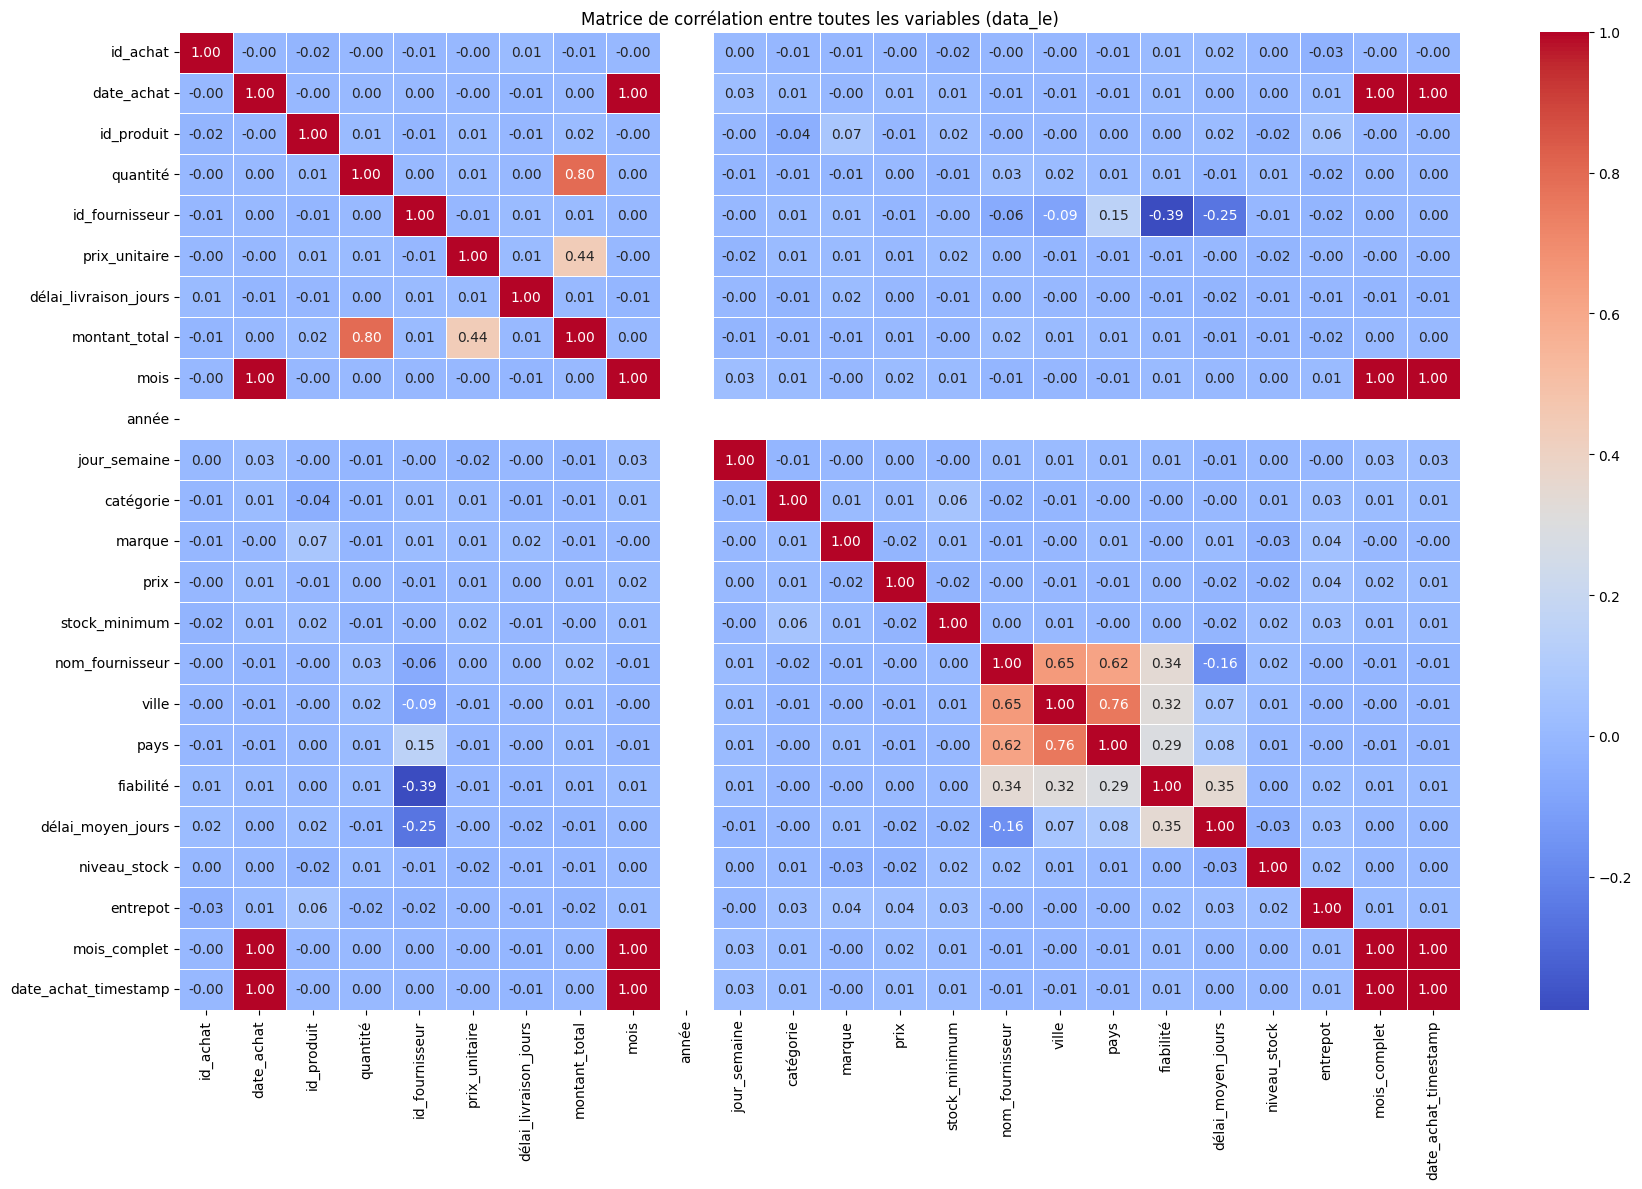

In [62]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcul de la matrice de corr√©lation sur data_le (toutes variables num√©riques)
plt.figure(figsize=(18, 12))
corr = data_le.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corr√©lation entre toutes les variables (data_le)")
plt.tight_layout()
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# S√©lection des features et de la cible
X = data_le.drop(['quantit√©', 'date_achat'], axis=1)
y = data_le['quantit√©']

# S√©paration en jeu d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entra√Ænement du mod√®le de r√©gression lin√©aire
reg = LinearRegression()
reg.fit(X_train, y_train)

# Pr√©dictions
y_pred = reg.predict(X_test)

# √âvaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 2182.50
R2 Score: 0.76


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# S√©lection des features et de la cible pour la r√©gression sur les d√©lais de livraison
X_delai = data_le.drop(['d√©lai_livraison_jours', 'date_achat'], axis=1)
y_delai = data_le['d√©lai_livraison_jours']

# S√©paration en jeu d'entra√Ænement et de test
X_train_delai, X_test_delai, y_train_delai, y_test_delai = train_test_split(X_delai, y_delai, test_size=0.2, random_state=42)

# Entra√Ænement du mod√®le de r√©gression lin√©aire
reg_delai = LinearRegression()
reg_delai.fit(X_train_delai, y_train_delai)

# Pr√©dictions
y_pred_delai = reg_delai.predict(X_test_delai)

# √âvaluation
mse_delai = mean_squared_error(y_test_delai, y_pred_delai)
r2_delai = r2_score(y_test_delai, y_pred_delai)

print(f"Mean Squared Error (d√©lai): {mse_delai:.2f}")
print(f"R2 Score (d√©lai): {r2_delai:.2f}")

Mean Squared Error (d√©lai): 14.04
R2 Score (d√©lai): -0.00



### R√©gression Lin√©aire ###
MAE  : 26.77369467178594
RMSE : 46.71718875846067
R¬≤   : 0.7589181618841471

### Random Forest Regressor ###
MAE  : 0.7361749999999999
RMSE : 2.939651127259832
R¬≤   : 0.9990454412201213


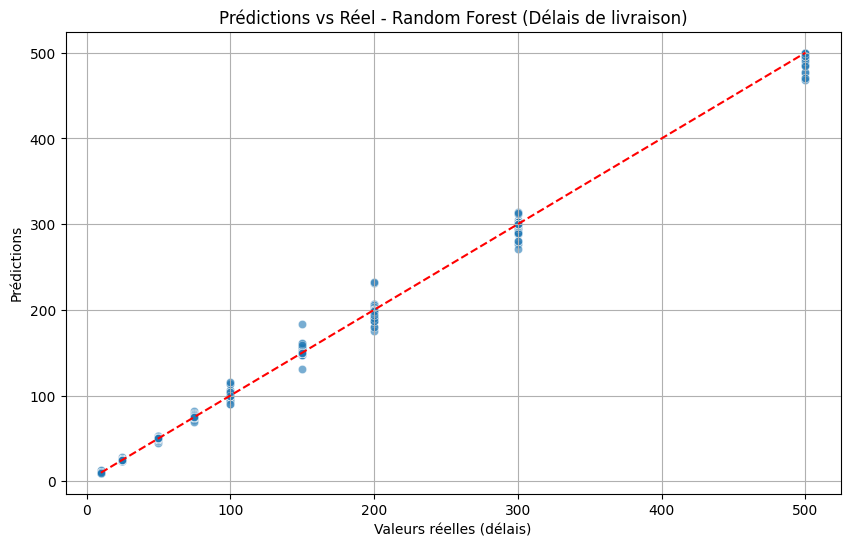

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Mise √† l‚Äô√©chelle des features ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- R√©gression Lin√©aire ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# --- Random Forest Regressor ---
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

# --- Fonction pour afficher les m√©triques de r√©gression ---
def print_regression_metrics(y_true, y_pred, model_name):
    print(f"\n### {model_name} ###")
    print("MAE  :", mean_absolute_error(y_true, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R¬≤   :", r2_score(y_true, y_pred))

# --- Affichage des performances ---
print_regression_metrics(y_test, y_pred_lin, "R√©gression Lin√©aire")
print_regression_metrics(y_test, y_pred_rf, "Random Forest Regressor")

# --- Graphique : Pr√©dictions vs R√©el pour Random Forest ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs r√©elles (d√©lais)")
plt.ylabel("Pr√©dictions")
plt.title("Pr√©dictions vs R√©el - Random Forest (D√©lais de livraison)")
plt.grid(True)
plt.show()



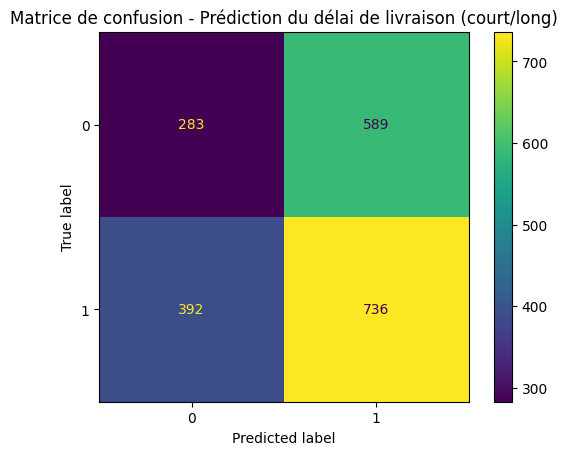

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binariser la cible : 1 si d√©lai <= m√©diane, 0 sinon
delai_median = data_le['d√©lai_livraison_jours'].median()
y_bin = (data_le['d√©lai_livraison_jours'] <= delai_median).astype(int)
X = data_le.drop(['d√©lai_livraison_jours', 'date_achat'], axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Mod√®le
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matrice de confusion - Pr√©diction du d√©lai de livraison (court/long)")
plt.show()


### R√©gression Lin√©aire ###
MAE  : 3.27
RMSE : 3.75
R¬≤   : -0.0

### Random Forest Regressor ###
MAE  : 3.3
RMSE : 3.81
R¬≤   : -0.04


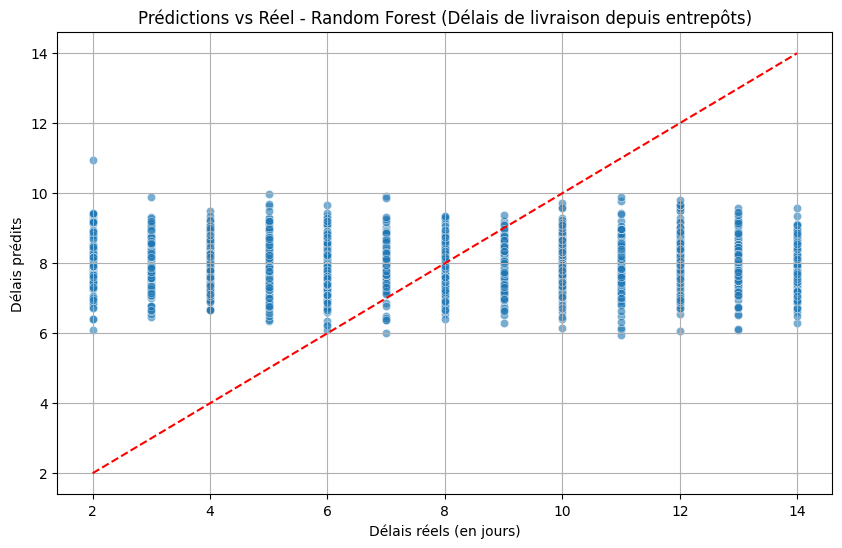

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Pr√©paration des donn√©es ---
# Supposons que 'data_le' soit d√©j√† pr√©trait√© (valeurs manquantes g√©r√©es, variables cat√©gorielles encod√©es, etc.)

# On enl√®ve les colonnes inutiles pour la pr√©diction
X_entrepots = data_le.drop(['d√©lai_livraison_jours', 'date_achat'], axis=1)
y_entrepots = data_le['d√©lai_livraison_jours']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_entrepots, y_entrepots, test_size=0.2, random_state=42)

# --- 2. Mise √† l‚Äô√©chelle des donn√©es ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Mod√®les de R√©gression ---

# R√©gression Lin√©aire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

# --- 4. Fonction d‚Äô√©valuation ---
def print_regression_metrics(y_true, y_pred, model_name):
    print(f"\n### {model_name} ###")
    print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R¬≤   :", round(r2_score(y_true, y_pred), 2))

# --- 5. Affichage des performances ---
print_regression_metrics(y_test, y_pred_lin, "R√©gression Lin√©aire")
print_regression_metrics(y_test, y_pred_rf, "Random Forest Regressor")

# --- 6. Visualisation : Pr√©dictions vs R√©el pour Random Forest ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("D√©lais r√©els (en jours)")
plt.ylabel("D√©lais pr√©dits")
plt.title("Pr√©dictions vs R√©el - Random Forest (D√©lais de livraison depuis entrep√¥ts)")
plt.grid(True)
plt.show()


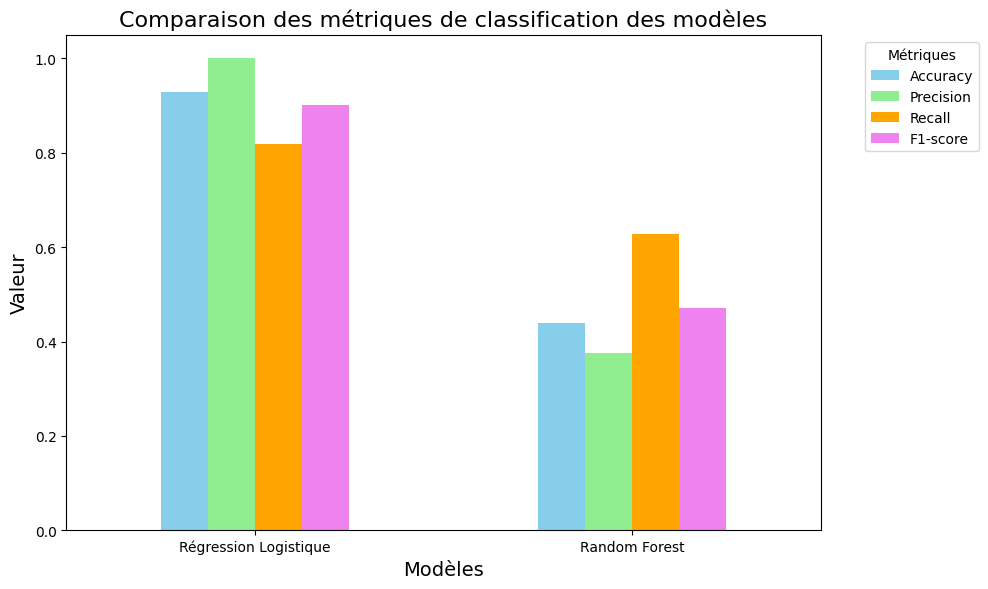

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des m√©triques pour la r√©gression logistique
acc_log_reg = accuracy_score(y_test_bin, y_pred_log_reg)
prec_log_reg = precision_score(y_test_bin, y_pred_log_reg)
rec_log_reg = recall_score(y_test_bin, y_pred_log_reg)
f1_log_reg = f1_score(y_test_bin, y_pred_log_reg)

# Calcul des m√©triques pour le Random Forest
acc_rf = accuracy_score(y_test_bin, y_pred)
prec_rf = precision_score(y_test_bin, y_pred)
rec_rf = recall_score(y_test_bin, y_pred)
f1_rf = f1_score(y_test_bin, y_pred)

# Cr√©ation d'un DataFrame pour stocker les r√©sultats
metrics = pd.DataFrame(
    {
        "Model": ["R√©gression Logistique", "Random Forest"],
        "Accuracy": [acc_log_reg, acc_rf],
        "Precision": [prec_log_reg, prec_rf],
        "Recall": [rec_log_reg, rec_rf],
        "F1-score": [f1_log_reg, f1_rf],
    }
)

# --- Visualisation ---
metrics.set_index("Model").plot(
    kind="bar", figsize=(10, 6), color=["skyblue", "lightgreen", "orange", "violet"]
)

plt.title("Comparaison des m√©triques de classification des mod√®les", fontsize=16)
plt.ylabel("Valeur", fontsize=14)
plt.xlabel("Mod√®les", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="M√©triques", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()